# Lab: K-Nearest Neighbors
---

The KNN Algorithm is a **Supervised Learning** classification algorithm.

In the practice section you will learn how to predict breast cancer using a **KNN** model.

Your task in this lab you will be using the **KNN** model to classify images of handwritten numbers from the MNIST dataset.



### **The steps of using a machine learning model:**

1. Load in the data
2. Decide which features will be used as the predictors (the X values), and which feature you want to predict (the y values)
3. Perform a test, train split to create a testing dataset and a training dataset.
4. Import an ML algorithm
5. Initialise the model
6. Fit the model on the training set
7. Draw a visualisation (if applicable to the model)
8. Test the model on the test set and evaluate the performance
9. Use your Model

## Part 1: Practice Together
---

### **Step \#0: Import the following before continuing**
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection

### **Step \#1: Load the data**
---

The following dataset is taken from the UCI ML Breast Cancer Wisconsin (Diagnostic) dataset and contains information mamography exams reults and whether or not cancer was detected.

In [ ]:
cancer_dataset = datasets.load_breast_cancer()
df = pd.DataFrame(data=cancer_dataset.data, columns=cancer_dataset.feature_names)
df['TARGET'] = cancer_dataset.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### **Part \#2: Decide independent and dependent variables**
---
##### *Decide which features will be used as the predictors (the X values), and which feature you want to predict (the y values)*


To simplify our **KNN** fitting we will focus on four features to fit our binary classifier.

We will fit our **KNN** classifier using "mean radius", "mean texture", "mean perimeter", and "mean area" features in order to predict whether the patient has breast cancer.

In [ ]:
# Slice our dataset to view the features we care about
df[["mean radius","mean texture", "TARGET"]]

,mean radius,mean texture,TARGET
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0
...,...,...,...
564,21.56,22.39,0
565,20.13,28.25,0
566,16.60,28.08,0
567,20.60,29.33,0


### **Part #2.1: Visualize the variables you'll be using**
---

Since we are building a classifier it can be useful to look at some of the variables and color the scatter plot depending on the value of the target.

Below we will look at `"mean radius"` and  `"mean texture"` and see if there is a correlation with the detection of cancer.

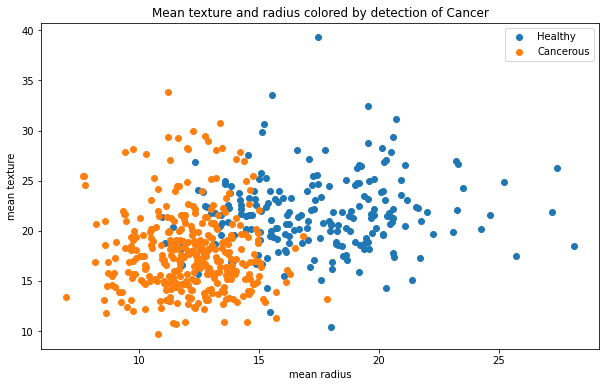

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

for label, data in df.groupby('TARGET'):
    ax.scatter(data["mean radius"], data["mean texture"], label=["Healthy", "Cancerous"][label])

ax.set_title("Mean texture and radius colored by detection of Cancer")
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.legend()
plt.show()

### **Part \#3: Split data into training and testing data**
---


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["mean radius","mean texture"]],
                                                                    df[["TARGET"]], test_size=0.2, random_state=42)

### **Step \#4: Import an ML algorithm (Using Sklearn algorithms)**
---
 

Steps for creating a KNN Model:

1. Import the algorithm from the correct Sklearn module:
  ```python
  # import the KNN algorithm
  from sklearn.neighbors import KNeigborsClassifier
  ```

2. Initialize the model
  ```python
  # Initialize the model
  model = KNeigborsClassifier()
  ```

3. Fit the model to the training data
  ```python
  # fit the model to the training data
  model.fit(X_train, y_train)
  ```

4. Use the model to predict a class based on new data
  ```python
  # Use the model to predict
  prediction = model.predict(x)
  ```


In [ ]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

### **Step \#5: Initialize your model**
---

Remember to set the *hyperparameter* `n_neighbors`!

In [ ]:
# initialize
model = KNeighborsClassifier(n_neighbors = 4)

### **Step \#6: Fit your model and make a prediction**
---

In [ ]:
# fit
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [ ]:
# predict
pred = model.predict(X_test)

### **Step \#7: Visualize Data and the decision boundary**
---

We can now use a colormesh plot to show the decision boundary of the KNN model.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


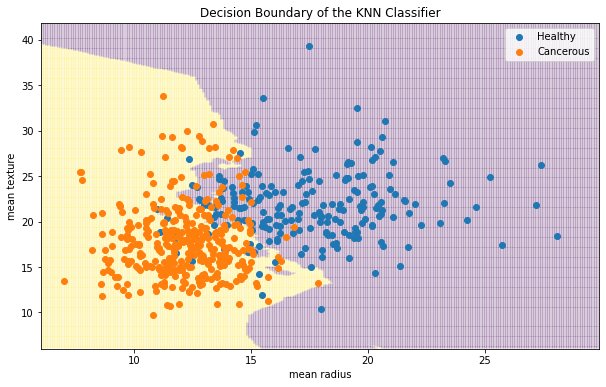

In [ ]:
# Make the same scatter plot of the training data

fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(6, 30, 0.1),
                     np.arange(6, 42, 0.1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in df.groupby('TARGET'):
    ax.scatter(data["mean radius"], data["mean texture"], label=["Healthy", "Cancerous"][label])

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.legend()
plt.show()

### **Step \#8: Use the following code to test the accuracy of your model**
---

In [ ]:
from sklearn.metrics import mean_squared_error, classification_report
print('Mean squared error: ', mean_squared_error(y_test, pred))

print(f'Percentage of correct predictions on test set: {sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100} %')

Mean squared error:  0.09649122807017543
Percentage of correct predictions on test set: 90.35087719298247 %


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        43
           1       0.95      0.89      0.92        71

    accuracy                           0.90       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



### **Step \#9:** Use the model
---


1. Does your model think that a patient with mean radius `15.5` and mean texture `31.2` have cancer?
2. Does your model think that a patient with mean radius `12.2` and mean texture `34.5` have cancer?


In [ ]:
patient1 = pd.DataFrame([[15.5, 31.2]], columns=["mean radius", "mean texture"])
prediction = model.predict(patient1)[0]
print(f"Patient 1 {['is not likely', 'is likely'][prediction]} to have cancer")

patient2 = pd.DataFrame([[12.2, 34.5]], columns=["mean radius", "mean texture"])
prediction = model.predict(patient2)[0]
print(f"Patient 2 {['is not likely', 'is likely'][prediction]} have cancer")

Patient 1 is not likely to have cancer
Patient 2 is likely have cancer


### **Optional:** Hyperparameter Tuning

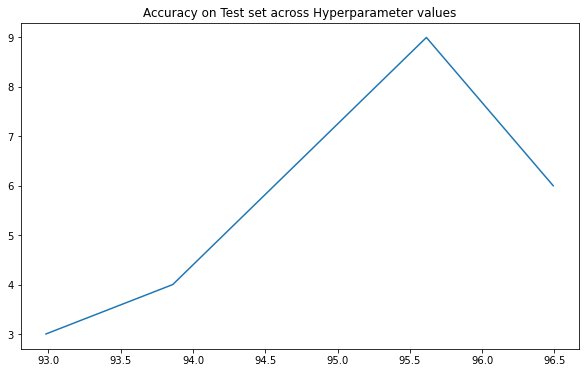

Top score of optimal classifier: 96.49%
Best Value of N to use: 6


In [ ]:
# Now lets see how accurate it is looking at all 30 variables

# Load all columns of the dataset
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                      df.drop("TARGET", axis=1), df[["TARGET"]],
                                      test_size=0.2, random_state=42)

# Hyperparameter tuning
scores = {}
for n in range(1,10):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[score] = n
    
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Accuracy on Test set across Hyperparameter values")
ax.plot(list(scores.keys()), list(scores.values()))
plt.show()

top_score = max(scores.keys())
print(f"Top score of optimal classifier: {top_score:.2f}%")
print(f"Best Value of N to use: {scores[top_score]}")

## Part 2: Independent Work
---

### **Step \#0: Import the following before continuing**
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection

### **Step \#1: Load the data**
---

The following dataset is taken from the UCI ML Wine Recognition dataset and contains the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators

In [ ]:
wine_dataset = datasets.load_wine()
df = pd.DataFrame(data=wine_dataset.data, columns=wine_dataset.feature_names)
df['TARGET'] = wine_dataset.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### **Part \#2: Decide independent and dependent variables**
---
##### *Decide which features will be used as the predictors (the X values), and which feature you want to predict (the y values)*


To simplify our **KNN** fitting we will focus on two features to fit our binary classifier.

We will fit our **KNN** classifier using "malic_acid" and "color_intensity" in order to predict which cultivator the wine originates from.

In [ ]:
# Slice our dataset to view the features we care about
df[["malic_acid","color_intensity", "TARGET"]]

,malic_acid,color_intensity,TARGET
0,1.71,5.64,0
1,1.78,4.38,0
2,2.36,5.68,0
3,1.95,7.80,0
4,2.59,4.32,0
...,...,...,...
173,5.65,7.70,2
174,3.91,7.30,2
175,4.28,10.20,2
176,2.59,9.30,2


### **Part #2.1: Visualize the variables you'll be using**
---

Since we are building a classifier it can be useful to look at some of the variables and color the scatter plot depending on the value of the target.

Below we will look at `"malic acid"` and  `"color intensity"` and see if there is a correlation with the cultivator number.

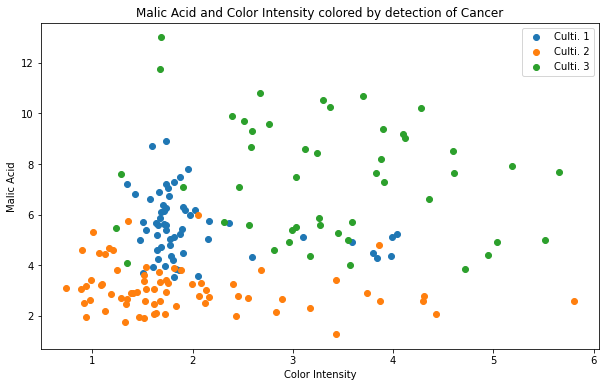

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

for label, data in df.groupby('TARGET'):
    ax.scatter(data["malic_acid"], data["color_intensity"], label=["Culti. 1", "Culti. 2", "Culti. 3"][label])

ax.set_title("Malic Acid and Color Intensity colored by detection of Cancer")
ax.set_xlabel("Color Intensity")
ax.set_ylabel("Malic Acid")
ax.legend()
plt.show()

### **Part \#3: Split data into training and testing data**
---


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["malic_acid","color_intensity"]],
                                                                    df[["TARGET"]], test_size=0.2, random_state=42)

### **Step \#4: Import an ML algorithm (Using Sklearn algorithms)**
---
 

Steps for creating a KNN Model:

1. Import the algorithm from the correct Sklearn module:
  ```python
  # import the KNN algorithm
  from sklearn.neighbors import KNeigborsClassifier
  ```

2. Initialize the model
  ```python
  # Initialize the model
  model = KNeigborsClassifier()
  ```

3. Fit the model to the training data
  ```python
  # fit the model to the training data
  model.fit(X_train, y_train)
  ```

4. Use the model to predict a class based on new data
  ```python
  # Use the model to predict
  prediction = model.predict(x)
  ```


In [ ]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

### **Step \#5: Initialize your model**
---

Remember to set the *hyperparameter* `n_neighbors`!

In [ ]:
# initialize
model = KNeighborsClassifier(n_neighbors = 4)

### **Step \#6: Fit your model and make a prediction**
---

In [ ]:
# fit
model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# predict
pred = model.predict(X_test)

### **Step \#8: Use the following code to test the accuracy of your model**
---

In [ ]:
from sklearn.metrics import mean_squared_error, classification_report
print('Mean squared error: ', mean_squared_error(y_test, pred))

print(f'Percentage of correct predictions on test set: {sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100} %')

Mean squared error:  0.5
Percentage of correct predictions on test set: 83.33333333333334 %


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.93      0.93      0.93        14
           2       0.83      0.62      0.71         8

    accuracy                           0.83        36
   macro avg       0.84      0.80      0.81        36
weighted avg       0.84      0.83      0.83        36



### **Step \#9:** Use the model
---


Who is likely to have cultivated a wine with `malic_acid = 4.1` and `color_intensity = 1.1` ?

In [ ]:
unknown_wine = pd.DataFrame([[4.1, 1.1]], columns=["malic_acid", "color_intensity"])
prediction = model.predict(unknown_wine)[0]
print(f"Wine is likely from {['cultivator 1', 'cultivator 2', 'cultivator 3'][prediction]} ")

Wine is likely from cultivator 2 
